<a href="https://colab.research.google.com/github/LIZZETHGOMEZ/Econometria_/blob/School/Entrega%20para%20Joce%20y%20Fitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ECONOMETRÍA
##Trabajo Final
* ### Cuenca Fitz Alexis Manuel
* ### Gomez Rodríguez Lizzeth
* ### Pineda Sandoval Tania Jocelyn




La base de datos a utilizar es la **ESRU-EMOVI 2017** que es una Encuesta de Movilidad Social del Centro de Estudios Espinosa Yglesias (CEEY), que se puede encontrar en la siguiente liga kjunto con el cuestionario: https://ceey.org.mx/contenido/que-hacemos/emovi

In [0]:
#Instalamos las paqueterías necesarias
!pip install pyreadstat
!pip install statsmodels
!pip install pandas plotnine
!pip install tabulate
!pip install numpy

In [0]:
#Importamos las librerías a utilizar
import pyreadstat #librería para leer  formato.dta
import pandas as pd #librería para manipulación de datos
import matplotlib #librería para graficar
from matplotlib import pyplot as plt #librería para graficar


import statsmodels.api as sm #librería para análisis estadístico
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit
from statsmodels.iolib.summary2 import summary_col

from tabulate import  tabulate


In [0]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

In [0]:
%matplotlib inline
import pylab as pl

In [0]:
import warnings
warnings.filterwarnings('ignore')
from plotnine import *

In [0]:
#Leemos la base de datos
emovi = pd.read_csv('Emovi4.csv')

In [0]:
emovi.head()

In [0]:
emovi.describe()

In [0]:
#Veamos cuantas personas son discriminadas
emovi.discriminacion.value_counts()

In [0]:
dis = emovi['discriminacion'].loc[emovi['discriminacion']==1]
dis1 = dis.value_counts()

In [0]:
#Extraemos a las personas que fueron discriminadas por cada area:
trabajo = emovi['dis_trabajo'].loc[emovi['dis_trabajo']==1]
trabajo1 = trabajo.value_counts()
escuela = emovi['dis_escuela'].loc[emovi['dis_escuela']==1]
escuela1 = escuela.value_counts()
oficina = emovi['dis_oficina'].loc[emovi['dis_oficina']==1]
oficina1 = oficina.value_counts()
hogar = emovi['dis_hogar'].loc[emovi['dis_hogar']==1]
hogar1 = hogar.value_counts()
barrio = emovi['dis_barrio'].loc[emovi['dis_barrio']==1]
barrio1 = barrio.value_counts()
otro = emovi['dis_otro'].loc[emovi['dis_otro']==1]
otro1 = otro.value_counts()


In [193]:
#Data Frame de Dsicriminación por lugares en Valores
table1 = pd.DataFrame({"Trabajo": trabajo1, "Escuela": escuela1, "Oficina": oficina1, "Hogar": hogar1, "Barrio": barrio1, "Otro": otro1})
table1

,Trabajo,Escuela,Oficina,Hogar,Barrio,Otro
1,114,88,65,51,128,37


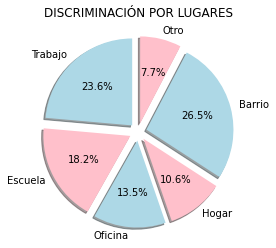

In [194]:
#GRAFICO DE DISCRIMINACIÓN POR LUGAR  
#Caracteristicas necesarias para el gráfico de pastel:
etiquetas = 'Trabajo', 'Escuela','Oficina','Hogar','Barrio', 'Otro'
tamaños = table1.values #Obtiene el array de los valores
colores = ['lightblue', 'pink',] #Colores para el piechart(gáfico de pastel)
resaltar = (0.1,0.1,0.1,0.1,0.1,0.1) #Separación para resaltar
# Plot
plt.pie(tamaños, explode=resaltar, labels=etiquetas, colors=colores,
autopct='%1.1f%%', shadow=True, startangle=90,) #Inicialización del objeto pie
plt.title("DISCRIMINACIÓN POR LUGARES")
plt.show() #Mostrar gráfica

In [0]:
#Sacamos porcentajes respecto a los individuos que constestaron que sí son discriminados
trabajo2 = (trabajo1/dis1)*100
escuela2 =(escuela1/dis1)*100
oficina2 =(oficina1/dis1)*100
hogar2 =(hogar1/dis1)*100
barrio2 = (barrio1/dis1)*100
otro2 = (otro1/dis1)*100

In [196]:
#Tabla Resumen de Discriminación por lugar en %
#No cuadra porque hay peronas que los discriminaron en varios lugares
#por lo cual se repiten en varios lugares
table = [["Trabajo",trabajo2],["Escuela",escuela2],["Oficina", oficina2],["Hogar",hogar2],["Barrio",barrio2],["Otro",otro2]]
print(tabulate(table))

-------  -------
Trabajo  32.6648
Escuela  25.2149
Oficina  18.6246
Hogar    14.6132
Barrio   36.6762
Otro     10.6017
-------  -------


#Estadpistica Descriptiva

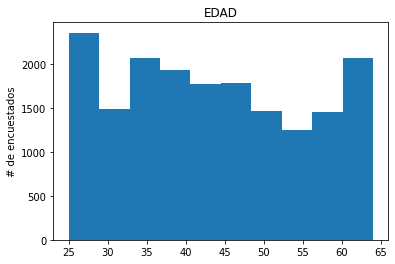

In [0]:
#GRÁFICO DE EDAD 
plt.hist(emovi.edad, histtype='bar')

#plt.legend()
plt.ylabel('# de encuestados')
plt.title('EDAD')

plt.show()

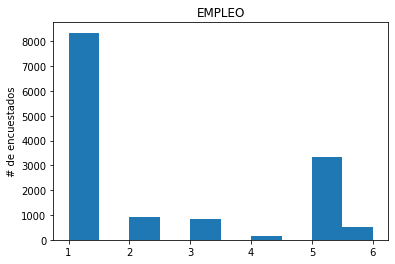

In [0]:
#GRÁFICO DE EMPLEO
plt.hist(emovi.empleo, histtype='bar')

#plt.legend()
plt.ylabel('# de encuestados')
plt.title('EMPLEO')

plt.show()

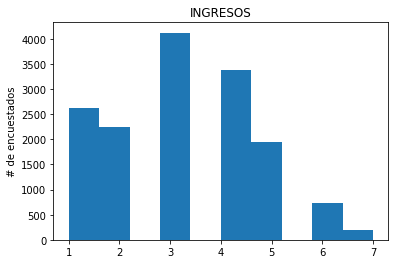

In [197]:
#GRÁFICO DE INGRESOS
plt.hist(emovi.ingreso, histtype='bar')

#plt.legend()
plt.ylabel("# de encuestados")
plt.title("INGRESOS")

plt.show()

Este gráfico muestra el total de ingreso mensual que perciben los hogares.
Los datos van desde un ingreso menor a un salario mínimo = 1 hasta más de 10 salarios mínimos = 7. \\

Se observa que la mayor parte de los hogares tienen ingresos mensuales de más de un salario mínimo hasta 2 salarios mínimos =3 mientras que son muy pocos los hogares que ganan más de más de 5 salarios mínimos (6 y 7). Enontces, la gráfica
claramente muestra una desigualdad de ingresos. 

Citando al CONEVAL "una familia de cuatro personas se encuentra actualmente en situación de pobreza
por ingresos si su ingreso mensual es inferior a \$11,290.80. Esta cifra es muy superior al salario mínimo
actual, que equivale a \$2,401.2 mensuales. Habría que incrementar 4.7 veces el salario mínimo para
cumplir lo estipulado en la Constitución Política de los Estados Unidos Mexicanos."
 (CONEVAL 2017)


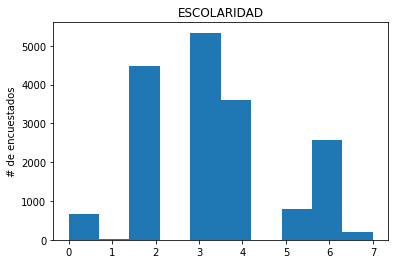

In [198]:
#GRÁFICO DE ESCOLARIDAD
plt.hist(emovi.escolaridad, histtype='bar')

#plt.legend()
plt.ylabel('# de encuestados')
plt.title('ESCOLARIDAD')

plt.show()

La gráfica muestra que la mayoría de los individuos presentan estudios al menos de primaria, secundaria y preparatira, mientras que son un número muy reducido los que no presentan estudios o bien han alcanzado estudios de posgrado.
En conclusión, la grafica representa la polarización en la educación de los individuos encuestados donde la media se concentra en niveles de educación básica. 

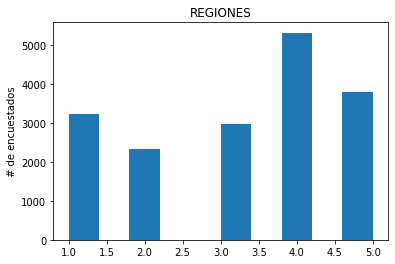

In [202]:
#GRÁFICO DE REGIONES
plt.hist(emovi.region, histtype='bar')

#plt.legend()
plt.ylabel('# de encuestados')
plt.title('REGIONES')

plt.show()

El gráfico muestra el tipo de regiones en donde se encuentran los individuos, 
La clasificación va de Norte = 1 a Sur = 5\\
De forma general se ve que están normalmente distribuidos, aunque la mayoría de ellos viven en el centro del país. 

In [211]:
#DISCRIMINACION POR INGRESO
(ggplot(emovi)
 + aes(x='color', y='ingreso', color='color', size='color')
 + geom_point()
 + labs(title='Ingresso por color de piel, x='Color de piel', y='Ingreso')
)

SyntaxError: ignored

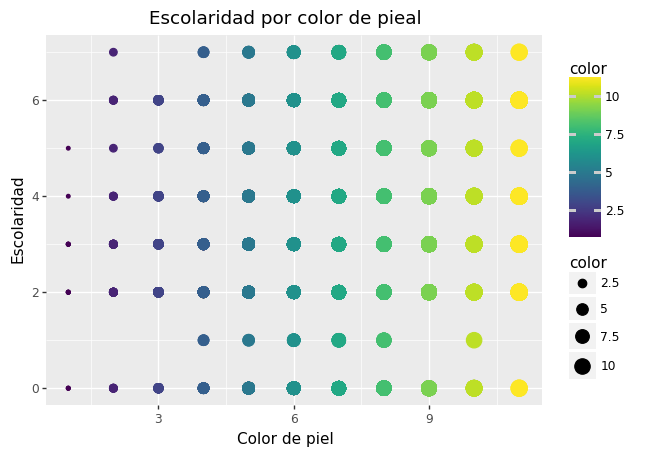

<ggplot: (8785724254924)>

In [212]:
#DISCRIMINACION POR ESCOLARIDAD
(ggplot(emovi)
 + aes(x='color', y='escolaridad', color='color', size='color')
 + geom_point()
 + labs(title='Escolaridad por color de pieal', x='Color de piel', y='Escolaridad')
)

La gráfica muestra el nivel de escolaridad de los individus según su color de piel\\
Tanto los colores como el tamaño de los circulos señalan el color de piel del individuo donde el morado oscuro representa un color de piel oscura y el amarillo un color de piel clara. \\
Se observa que las personas con piel oscura apenas alcanzan a obtener estudios de carrera técnia, mientras que un color de piel más clara indica que alcanzan hasta un grado de posgrado. \\

Cabe añadir que la ggráfoca tiende a mostrar insignificancia en la educación básica ya que sin importar el color de piela, si se inician estudios estos logran ser terminados al menos hasta un bachillerato, sin embargo la gráfica no es un determinante para afirmarlo. Con lo cual más adelante se porcede a realizar un análsis de regresión logística que nos dirá más acertadamente la verdadera significancia de la relación entre el nivel de escolaridad y el color de piel.

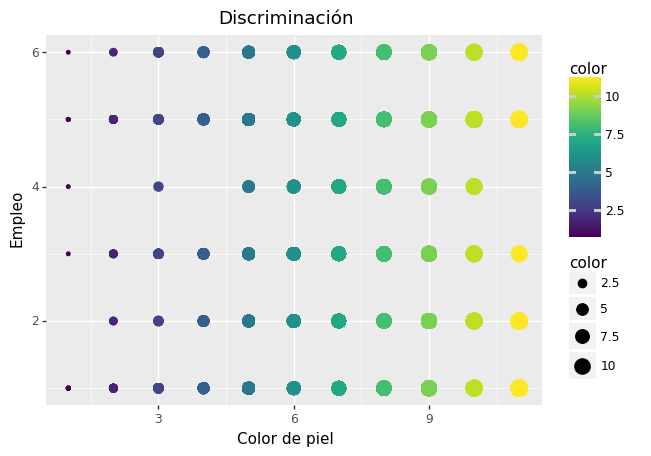

<ggplot: (-9223363257297860906)>

In [0]:
#DISCIRMINACION POR EMPLEO
(ggplot(emovi)
 + aes(x='color', y='empleo', color='color', size='color')
 + geom_point()
 + labs(title='Discriminación', x='Color de piel', y='Empleo')
)

In [177]:
#GRAFICO DE SEXO
#Caracteristicas necesarias para el gráfico de pastel:
etiquetas = 'Mujer', 'Hombre'
sexos = emovi['sexo'].value_counts() #Saca la frecuencia con la que se repiten en el data_frame los valores únicos por campo
tamaños = sexos.values #Obtiene el array de los valores
colores = ['lightblue', 'pink'] #Colores para el piechart(gáfico de pastel)
resaltar = (0.1, 0) #Separación para resaltar
sexos


2    10746
1     6919
Name: sexo, dtype: int64

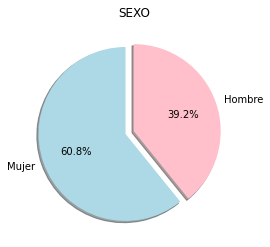

In [178]:
# Plot
plt.pie(tamaños, explode=resaltar, labels=etiquetas, colors=colores,
autopct='%1.1f%%', shadow=True, startangle=90,) #Inicialización del objeto pie
plt.title("SEXO")
plt.show() #Mostrar gráfica

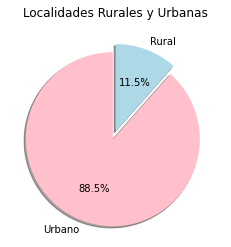

In [179]:
#GRAFICO DE LOCALIDADES
#Caracteristicas necesarias para el gráfico de pastel:
etiquetas = 'Urbano', 'Rural'
rural = emovi['rururb'].value_counts() #Saca la frecuencia con la que se repiten en el data_frame los valores únicos por campo
tamaños = rural.values #Obtiene el array de los valores
colores = ['pink', 'lightblue'] #Colores para el piechart(gáfico de pastel)
resaltar = (0.1, 0) #Separación para resaltar
# Plot
plt.pie(tamaños, explode=resaltar, labels=etiquetas, colors=colores,
autopct='%1.1f%%', shadow=True, startangle=90,) #Inicialización del objeto pie
plt.title("Localidades Rurales y Urbanas")
plt.show() #Mostrar gráfica


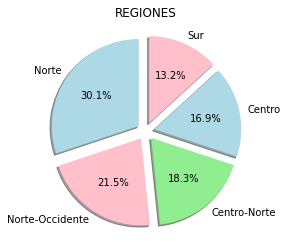

In [181]:
#GRAFICO DE REGIONES
#Caracteristicas necesarias para el gráfico de pastel:
etiquetas = 'Norte', 'Norte-Occidente','Centro-Norte','Centro','Sur'
reg = emovi['region'].value_counts() #Saca la frecuencia con la que se repiten en el data_frame los valores únicos por campo
tamaños = reg.values #Obtiene el array de los valores
colores = ['lightblue', 'pink','lightgreen'] #Colores para el piechart(gáfico de pastel)
resaltar = (0.1, 0.1,0.1,0.1,0.1) #Separación para resaltar
#Plot
plt.pie(tamaños, explode=resaltar, labels=etiquetas, colors=colores,
autopct='%1.1f%%', shadow=True, startangle=90,) #Inicialización del objeto pie
plt.title("REGIONES")
plt.show() #Mostrar gráfica

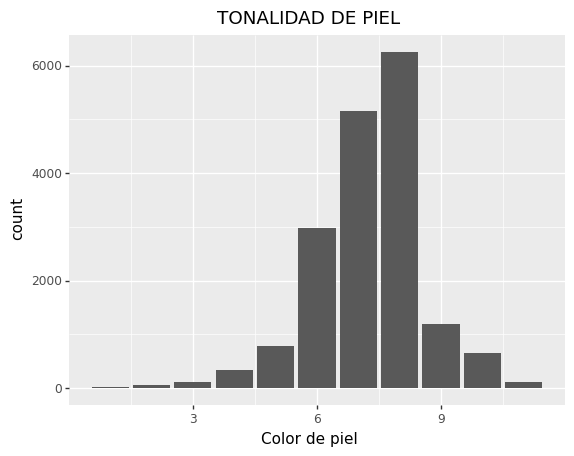

<ggplot: (8779561300758)>

In [0]:
#GRAFICO DE COLOR DE PIEL
(ggplot(emovi)         # defining what data to use
 + aes(x='color')    # defining what variable to use
 + geom_bar(size=15) # defining the type of plot to use
 + labs(title='TONALIDAD DE PIEL', x='Color de piel')
)

In [0]:
1 $\rightarrow$ hombre

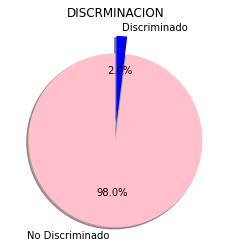

In [185]:
#GRAFICO DE DISCRIMINACION
#Caracteristicas necesarias para el gráfico de pastel:
etiquetas = 'No Discriminado','Discriminado'
dis = emovi['discriminacion'].value_counts() #Saca la frecuencia con la que se repiten en el data_frame los valores únicos por campo
tamaños = dis.values #Obtiene el array de los valores
colores = ['pink', 'blue'] #Colores para el piechart(gáfico de pastel)
resaltar = (0.1, 0.1) #Separación para resaltar
#Plot
plt.pie(tamaños, explode=resaltar, labels=etiquetas, colors=colores,
autopct='%1.1f%%', shadow=True, startangle=90,) #Inicialización del objeto pie
plt.title("DISCRMINACION")
plt.show() #Mostrar gráfica

#ANÁLISIS LOGÍSTICO

In [0]:
# Borrado de NA's 
emovi_1 = emovi.dropna(subset=['discriminacion', 'color', 'rururb', 'region', 'empleo', 'escolaridad', 'ingreso'])

###PROBABILIDADES DE INGRESO POR COLOR DE PIEL

In [0]:
X = emovi_1[['color', 'escolaridad', 'empleo']]
X = sm.add_constant(X)
Y = emovi_1['ingreso']
mdl = sm.MNLogit(Y, X)
mdl_fit = mdl.fit()

Optimization terminated successfully.
         Current function value: 1.644304
         Iterations 9


In [0]:
# Imprimiendo Resultados:
print(mdl_fit.summary())

                          MNLogit Regression Results                          
Dep. Variable:                ingreso   No. Observations:                12370
Model:                        MNLogit   Df Residuals:                    12346
Method:                           MLE   Df Model:                           18
Date:                Fri, 12 Jun 2020   Pseudo R-squ.:                 0.05772
Time:                        01:07:16   Log-Likelihood:                -20340.
converged:                       True   LL-Null:                       -21586.
Covariance Type:            nonrobust   LLR p-value:                     0.000
  ingreso=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.8745      0.192     -4.563      0.000      -1.250      -0.499
color           0.0828      0.025      3.371      0.001       0.035       0.131
escolaridad     0.0782      0.015      5.157    

In [0]:
# Efectos Marginnales: Ingreso por Color de Piel
mdl_margeff = mdl_fit.get_margeff()
print(mdl_margeff.summary())

       MNLogit Marginal Effects      
Dep. Variable:                ingreso
Method:                          dydx
At:                           overall
  ingreso=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
color          -0.0105      0.003     -3.795      0.000      -0.016      -0.005
escolaridad    -0.0032      0.001     -2.708      0.007      -0.006      -0.001
empleo          0.0163      0.002      8.184      0.000       0.012       0.020
-------------------------------------------------------------------------------
  ingreso=2      dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
color          -0.0032      0.002     -1.529      0.126      -0.007       0.001
escolaridad    -0.0155      0.001    -14.254      0.000      -0.018      -0.013
empleo          0.0071      0.001      4.843    

###PROBABILIDADES DEL TIPO DE EMPLEO POR COLOR DE PIEL

In [0]:
X = emovi_1[['color', 'rururb', 'sexo','escolaridad']]
X = sm.add_constant(X)
Y = emovi_1['empleo']
mdl = sm.MNLogit(Y, X)
mdl_fit = mdl.fit()

Optimization terminated successfully.
         Current function value: 1.067294
         Iterations 8


In [0]:
# Imprimiendo Resultados:
print(mdl_fit.summary())

In [0]:
# Efectos Marginnales: de Empleo por color de piel
mdl_margeff = mdl_fit.get_margeff()
print(mdl_margeff.summary())

###PROBABILIDADES DE OBTENER GRADOS POR COLOR DE PIEL

In [205]:
X = emovi_1[['color','sexo','ingreso','region']]
X = sm.add_constant(X)
Y = emovi_1['escolaridad']
mdl = sm.MNLogit(Y, X)
mdl_fit = mdl.fit()

Optimization terminated successfully.
         Current function value: 1.514456
         Iterations 11


In [206]:
# Imprimiendo Resultados:
print(mdl_fit.summary())

                          MNLogit Regression Results                          
Dep. Variable:            escolaridad   No. Observations:                12370
Model:                        MNLogit   Df Residuals:                    12335
Method:                           MLE   Df Model:                           28
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:                 0.06631
Time:                        00:47:49   Log-Likelihood:                -18734.
converged:                       True   LL-Null:                       -20064.
Covariance Type:            nonrobust   LLR p-value:                     0.000
escolaridad=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3380      1.720     -0.778      0.437      -4.710       2.034
color            -0.0256      0.192     -0.133      0.894      -0.402       0.351
sexo              0.0608      0.543     

In [207]:
# Efectos Marginnales: Escolaridad por Color de piel
mdl_margeff = mdl_fit.get_margeff()
print(mdl_margeff.summary())

       MNLogit Marginal Effects      
Dep. Variable:            escolaridad
Method:                          dydx
At:                           overall
escolaridad=0      dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
color            -0.0028      0.001     -2.534      0.011      -0.005      -0.001
sexo              0.0017      0.003      0.565      0.572      -0.004       0.008
ingreso          -0.0141      0.001    -10.656      0.000      -0.017      -0.012
region            0.0061      0.001      5.120      0.000       0.004       0.008
---------------------------------------------------------------------------------
escolaridad=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
color            -0.0001      0.000     -0.597      0.550      -0.001       0.000
sexo              0.0001    

Acorde con los efectos marginales, solo dos niveles de escolaridad resultaron no significativos a un nivel de confianza del 90% tales fueron: "estudiar preescolar o kinder" y "carrera técnica".
Encuanto al resto de los grados, a un nivel de confianza del 95% se tiene lo siguiente:

 **No presentar estudios** muestra una relación negativa, lo que implica que entre más claro sea el color de piel las probabilidades de no contar con estudios se reducen en 0.28%

Tener **Primaria** terminada presenta una relación negativa con el color de piel, lo que indica que entre más claro sea la tonalidad del color de piel, la probabilidad de tener primaria terminada se reduce en 1.65%.

Tener **Secundaria** terminada muestra una relación negativa con el color de piel, indicando que los individuos cuyo color de piel es más claro reducen sus probabilidades de tener secundaria en 1.65%

Nótese que estos resultados parecieran ser negativos para las personas de color de piel clara, sin embargo no es así, lo que realmente muestran los datos es que las personas con un color de piel más claro tienen menos probabilidades de presentar únicamente educación básica, ya que tienden a presentar niveles de educación superior en comparación con las personas de color de piel oscura.

Los estudios de **Preparatoria** muestran una relación positiva, es decir que entre má claro se a el color de piel del indivisuo sus probabilidades de obtener estudios de bachillerato se incrementan en 0.78%

Los estudios de **licenciatura** muestran una relación positiva, lo que indica que entre más claro el color de piel, las probabilidades de presentar estudios de licenciatura se incrementan en 2.69%. 

Los estudios de **posgrado** muestran también una relación positiva con el color de piel, entre más clara sea la tonalidad de piel de una persona, su probabilidad de obtener un posgrado aumenta en 0.17%

